# MTH 337: Week 8

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Complex Numbers

- Complex numbers can be understood as pairs of real numbers (x, y) with rules for arithmetic defined on them.
- Python "understands" complex numbers.
- Python uses j to denote &radic;-1.
- The complex number (x, y) can be created using complex(x, y).
- The complex number (x, y) can also be typed in directly as x + yj.
- Complex numbers are printed as (x+yj).

### Creating Complex Numbers
#### Create a complex number using complex(x, y)

In [2]:
a = complex(2, 3)
print(a)

(2+3j)


#### Or, type in the number in the form x+yj

In [3]:
b = 1+2j
print(b)

(1+2j)


### Complex Arithmetic
#### The rules of complex arithmetic are all built into Python.

In [4]:
a+b

(3+5j)

In [5]:
a-b

(1+1j)

In [6]:
a*b

(-4+7j)

In [7]:
a/b

(1.6-0.2j)

## The "cube roots of unity"

- These are the numbers z such that z<sup>3</sup> = 1. In polar form (r, $\theta$), these roots have r = 1 and $\theta$ = 0, 2$\pi$/3 and 4$\pi$/3.
- The (x, y) coordinate form can be calculated from the polar form using x = r cos($\theta$), y = r sin($\theta$).
- This is done in Python using a list comprehension below.

In [2]:
roots = np.array([complex(np.cos(2*np.pi*i/3), np.sin(2*np.pi*i/3)) for i in range(3)])

In [3]:
print(roots)

[ 1.0+0.j        -0.5+0.8660254j -0.5-0.8660254j]


### meshgrid

- The NumPy function "meshgrid" function creates two 2d arrays X and Y from two 1d arrays x and y.
- The X array contains the x coordinate of each point in the 2d plane, and the Y array contains the y coordinate of each point in the 2d plane.

In [4]:
x = np.arange(4)
y = np.arange(3)
print(x)
print(y)
X, Y = np.meshgrid(x, y)
print(X)
print(Y)

[0 1 2 3]
[0 1 2]
[[0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]]
[[0 0 0 0]
 [1 1 1 1]
 [2 2 2 2]]


#### Using meshgrid to create a 2d array of points in the complex plane.

First create 1d arrays of the real and imaginary values used for the grid.

In [5]:
npts = 5
x = np.linspace(-1, 1, npts)
y = np.linspace(-1j, 1j, npts)
print(x, y)

[-1.  -0.5  0.   0.5  1. ] [ 0.-1.j   0.-0.5j  0.+0.j   0.+0.5j  0.+1.j ]


#### Create 2d arrays for the real and imaginary parts of each point in the plane.

- The X array holds the real part of each point.
- The Y array holds the imaginary part of each point.

In [6]:
X, Y = np.meshgrid(x, y)
print(X)
print(Y)

[[-1.  -0.5  0.   0.5  1. ]
 [-1.  -0.5  0.   0.5  1. ]
 [-1.  -0.5  0.   0.5  1. ]
 [-1.  -0.5  0.   0.5  1. ]
 [-1.  -0.5  0.   0.5  1. ]]
[[ 0.-1.j   0.-1.j   0.-1.j   0.-1.j   0.-1.j ]
 [ 0.-0.5j  0.-0.5j  0.-0.5j  0.-0.5j  0.-0.5j]
 [ 0.+0.j   0.+0.j   0.+0.j   0.+0.j   0.+0.j ]
 [ 0.+0.5j  0.+0.5j  0.+0.5j  0.+0.5j  0.+0.5j]
 [ 0.+1.j   0.+1.j   0.+1.j   0.+1.j   0.+1.j ]]


#### Add the real and imaginary parts together

In [7]:
Z = X+Y
print(Z)

[[-1.0-1.j  -0.5-1.j   0.0-1.j   0.5-1.j   1.0-1.j ]
 [-1.0-0.5j -0.5-0.5j  0.0-0.5j  0.5-0.5j  1.0-0.5j]
 [-1.0+0.j  -0.5+0.j   0.0+0.j   0.5+0.j   1.0+0.j ]
 [-1.0+0.5j -0.5+0.5j  0.0+0.5j  0.5+0.5j  1.0+0.5j]
 [-1.0+1.j  -0.5+1.j   0.0+1.j   0.5+1.j   1.0+1.j ]]


#### Turn off the warnings for divide by zero

In [8]:
import warnings
warnings.filterwarnings('ignore')

#### Newton's method can be applied directly to an array of initial points.

In [9]:
niters = 15
for i in range(niters):
    Z = Z - (Z**3 - 1)/(3*Z**2)
print(Z)

[[-0.5-0.8660254j -0.5-0.8660254j -0.5-0.8660254j -0.5+0.8660254j  1.0+0.j       ]
 [-0.5-0.8660254j -0.5-0.8660254j -0.5-0.8660254j -0.5-0.8660254j  1.0+0.j       ]
 [ 1.0+0.j         1.0+0.j         nan      +nanj  1.0+0.j         1.0+0.j       ]
 [-0.5+0.8660254j -0.5+0.8660254j -0.5+0.8660254j -0.5+0.8660254j  1.0+0.j       ]
 [-0.5+0.8660254j -0.5+0.8660254j -0.5+0.8660254j -0.5-0.8660254j  1.0+0.j       ]]


#### A point $z_0$ converges to a root if the sequence $z_0, z_1, \ldots$ finishes within some small distance from the root.

#### The boolean array "root1" contains True for initial points that converge to the first root, and zero otherwise.

In [10]:
tol = 0.01
root1 = np.abs(Z - roots[0]) < tol
print(root1)

[[False False False False  True]
 [False False False False  True]
 [ True  True False  True  True]
 [False False False False  True]
 [False False False False  True]]


#### The boolean arrays "root2" and "root3" do the same thing for the second and third roots.

In [11]:
root2 = np.abs(Z - roots[1]) < tol
root3 = np.abs(Z - roots[2]) < tol

#### Finally, the red, green and blue components of the image can be set according to which root each initial point converged to.

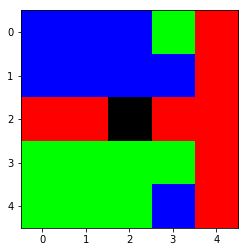

In [12]:
img = np.zeros((npts, npts, 3))
img[:,:,0] = root1
img[:,:,1] = root2
img[:,:,2] = root3
plt.imshow(img);

## Boolean Array Indexing

We can use an array of booleans as an index for another array. The only elements selected are those with a matching True in the index array.

In [13]:
a = np.arange(5)
print(a)
b = np.array([True, True, False, False, True])
print(b)
print(a[b])

[0 1 2 3 4]
[ True  True False False  True]
[0 1 4]


#### Boolean array used to select just the elements satisfying some condition.

- The condition results in an array of booleans.
- This array is then used as an index.

In [14]:
a = np.arange(5)
print(a)
print(a > 2)
print(a[a > 2])

[0 1 2 3 4]
[False False False  True  True]
[3 4]


#### Boolean array used to modify just those elements satisfying some condition.

In [15]:
b = (a % 2 == 0)
print(b)
a[b] = 100
print(a)

[ True False  True False  True]
[100   1 100   3 100]


#### Using a boolean array to set all three color components at once for each root.

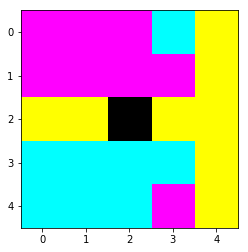

In [16]:
img = np.zeros((npts, npts, 3))
img[root1] = [1, 1, 0]
img[root2] = [0, 1, 1]
img[root3] = [1, 0, 1]
plt.imshow(img);